Exercise 1

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Pre-procesamiento

In [16]:
# Leer los datos del archivo CSV
clientes_data = pd.read_csv('./datos_de_clientes.csv', sep='\t')

# Testing

print("\n\n\n\n\nDatos:\n\n\n\n\n")
for columna in clientes_data.columns:
    print(f"\nColumna: {columna}")
    print(clientes_data[columna].unique())

# Tipos de datos
print("\nTipos de datos:\n")
for col in clientes_data.columns:
    print(f"{col}: {type(clientes_data[col][0])}")






Datos:






Columna: ID
[5524 2174 4141 ... 7270 8235 9405]

Columna: Year_Birth
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Columna: Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Columna: Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Columna: Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]

Columna: Kidhome
[0 1 2]

Columna: Teenhome
[0 1 2]

Columna: Dt_Customer
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013'

## Importar datos, eliminar atributos, convertir formatos atributos, codificar atributos

In [17]:
# Leer los datos del archivo CSV
clientes_data = pd.read_csv('./datos_de_clientes.csv', sep='\t')

# Eliminar las columnas "Z_CostContact" y "Z_Revenue" ya que contienen el mismo valor para todas las filas, por lo que no aportan información
clientes_data = clientes_data.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Convertir la columna 'Dt_Customer' a tipo datetime
clientes_data['Dt_Customer'] = pd.to_datetime(clientes_data['Dt_Customer'], format='%d-%m-%Y')

# Convertir las columnas 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain' a tipo booleano
clientes_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']] = clientes_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']].astype(bool)


#Arregla los datos de estado marital, quitando los valores atipicos 
# Reemplazar los valores "YOLO" y "Absurd" por "Married"
clientes_data['Marital_Status'] = clientes_data['Marital_Status'].replace(['YOLO', 'Absurd'], 'Married')
# Reemplazar los valores "Alone" por "Single"
clientes_data['Marital_Status'] = clientes_data['Marital_Status'].replace('Alone', 'Single')

# Diccionarios de mapeo para codificación ordinal
education_mapping = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
marital_status_mapping = {'Single': 1, 'Widow': 2, 'Divorced': 3, 'Together': 4, 'Married': 5}

# Aplicar la codificación ordinal y reemplazar las columnas originales
clientes_data['Education'] = clientes_data['Education'].map(education_mapping)
clientes_data['Marital_Status'] = clientes_data['Marital_Status'].map(marital_status_mapping)


#Revisar si hay espacio vacios
# Iterar sobre las filas del DataFrame
for index, row in clientes_data.iterrows():
    # Verificar si hay un valor nulo en la columna 'ID'
    if pd.isnull(row['ID']):
        print("Hay un espacio vacío en el ID", index)

# Definir la función lambda para codificar las fechas
def codificar_fecha(fecha):
    if fecha.year < 2013:
        return 1
    elif fecha.year == 2013:
        return 2
    else:
        return 3

# Aplicar la función lambda a la columna 'Dt_Customer'
clientes_data['Dt_Customer'] = clientes_data['Dt_Customer'].apply(lambda x: codificar_fecha(x))


## Eliminar datos atípicos

In [18]:
index = 1
num_atipicos = 1
while num_atipicos > 0:
    print(f"\n\nIteración {index}\n")
    # Imprimir el número de filas
    print("Número de filas:", clientes_data.shape[0])
    
    # Calcular los cuartiles para cada columna
    Q1_income = clientes_data['Income'].quantile(0.25)
    Q3_income = clientes_data['Income'].quantile(0.75)
    IQR_income = Q3_income - Q1_income

    Q1_recency = clientes_data['Recency'].quantile(0.25)
    Q3_recency = clientes_data['Recency'].quantile(0.75)
    IQR_recency = Q3_recency - Q1_recency

    # Calcula Q1, Q3 e IQR para las columnas relacionadas con el gasto en productos
    columns_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    Q1_mnt = clientes_data[columns_mnt].quantile(0.25)
    Q3_mnt = clientes_data[columns_mnt].quantile(0.75)
    IQR_mnt = Q3_mnt - Q1_mnt

    # Calcula Q1, Q3 e IQR para las columnas relacionadas con el número de compras y visitas
    columns_purchases_visits = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    Q1_purchases_visits = clientes_data[columns_purchases_visits].quantile(0.25)
    Q3_purchases_visits = clientes_data[columns_purchases_visits].quantile(0.75)
    IQR_purchases_visits = Q3_purchases_visits - Q1_purchases_visits

    # Identificar datos atípicos en las columnas seleccionadas
    datos_atipicos_income = (clientes_data['Income'] < (Q1_income - 1.5 * IQR_income)) | (clientes_data['Income'] > (Q3_income + 1.5 * IQR_income))
    datos_atipicos_recency = (clientes_data['Recency'] < (Q1_recency - 1.5 * IQR_recency)) | (clientes_data['Recency'] > (Q3_recency + 1.5 * IQR_recency))
    datos_atipicos_mnt = ((clientes_data[columns_mnt] < (Q1_mnt - 1.5 * IQR_mnt)) | (clientes_data[columns_mnt] > (Q3_mnt + 1.5 * IQR_mnt))).any(axis=1)
    datos_atipicos_purchases_visits = ((clientes_data[columns_purchases_visits] < (Q1_purchases_visits - 1.5 * IQR_purchases_visits)) | (clientes_data[columns_purchases_visits] > (Q3_purchases_visits + 1.5 * IQR_purchases_visits))).any(axis=1)

    # Combinar los resultados de detección de valores atípicos
    datos_atipicos = datos_atipicos_income | datos_atipicos_recency | datos_atipicos_mnt | datos_atipicos_purchases_visits
    # Imprimir el número de filas con valores atípicos
    print("Número de filas con valores atípicos:", clientes_data[datos_atipicos].shape[0])
    num_atipicos = clientes_data[datos_atipicos].shape[0]

    # Filtrar el DataFrame original para eliminar las filas con valores atípicos
    clientes_data = clientes_data[~datos_atipicos]

    # Imprimir el número de filas después de eliminar los valores atípicos
    print("Número de filas después de eliminar los valores atípicos:", clientes_data.shape[0])
    index += 1

# Muestra cuántos valores nulos hay en cada columna
print(clientes_data.isnull().sum())



Iteración 1

Número de filas: 2240
Número de filas con valores atípicos: 704
Número de filas después de eliminar los valores atípicos: 1536


Iteración 2

Número de filas: 1536
Número de filas con valores atípicos: 410
Número de filas después de eliminar los valores atípicos: 1126


Iteración 3

Número de filas: 1126
Número de filas con valores atípicos: 290
Número de filas después de eliminar los valores atípicos: 836


Iteración 4

Número de filas: 836
Número de filas con valores atípicos: 477
Número de filas después de eliminar los valores atípicos: 359


Iteración 5

Número de filas: 359
Número de filas con valores atípicos: 67
Número de filas después de eliminar los valores atípicos: 292


Iteración 6

Número de filas: 292
Número de filas con valores atípicos: 47
Número de filas después de eliminar los valores atípicos: 245


Iteración 7

Número de filas: 245
Número de filas con valores atípicos: 16
Número de filas después de eliminar los valores atípicos: 229


Iteración 8

Núm

## PCA

Valores NaN en tus datos antes de la imputación:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 4
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64
Valores NaN en tus datos después de la imputación:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency     

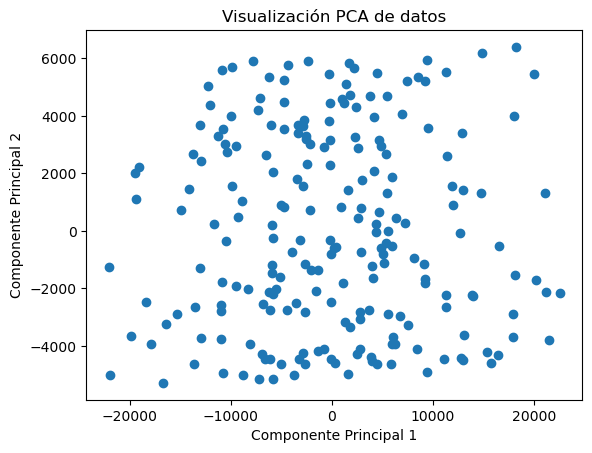

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Identificar valores NaN en tus datos
valores_nan_iniciales = clientes_data.isna().sum()

print("Valores NaN en tus datos antes de la imputación:")
print(valores_nan_iniciales)

# Crear un imputador para reemplazar los NaN con la media
imputer = SimpleImputer(strategy='median')  # Puedes cambiar la estrategia según tus preferencias

# Aplicar el imputador a tus datos
clientes_data_imputed = imputer.fit_transform(clientes_data)

# Crear un DataFrame con los datos imputados y los nombres de las columnas originales
clientes_data_imputed_df = pd.DataFrame(clientes_data_imputed, columns=clientes_data.columns)

# Obtener la lista de valores NaN después de la imputación con nombres de columnas
valores_nan_despues_imputacion = clientes_data_imputed_df.isna().sum()

print("Valores NaN en tus datos después de la imputación:")
print(valores_nan_despues_imputacion)

# Crear una instancia de PCA y especificar el número de componentes deseados
pca = PCA(n_components=2)  # Cambia el número de componentes según sea necesario

# Ajusta PCA a tus datos imputados y transforma los datos a las nuevas dimensiones
X_pca = pca.fit_transform(clientes_data_imputed)

# Visualizar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Graficar los datos en el nuevo espacio de características
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA de datos')
plt.show()